In [ ]:
from pathlib import Path
import datetime

import gymnasium as gym
import torch

from policy_based import PolicyNetFunc, PolicyNetTrainer, PolicyNetTester
from deep_q import Discrete1ContinuousAction
from env import Env
from utils import clear_target_path, show_gif_on_jupyternb, to_gif

### Lab1 Policy-Base Train

使用CarPole-V1 环境，测试Policy-Based REINFORCE 算法

In [ ]:
GYM_ENV_NAME = 'CartPole-v1'
_train_gym_env = gym.make(GYM_ENV_NAME)
env = Env(_train_gym_env)

# 打印查看环境的动作空间和状态空间 
action_nums, state_space = _train_gym_env.action_space.n, _train_gym_env.observation_space
print(f'action num: {action_nums}, space: {state_space}')

TRAIN_EPOCH = 1000
HIDDEN_DIM = 256
LEARNING_RATE = 2e-3
GAMMA = 0.99


LOG_PATH = Path('./run/logs/cartpoleV1/REINFORCE')
MODEL_PATH = Path('./run/model/cartpoleV1/REINFORCE.pth')
TEST_OUTPUT_PATH = Path('./run/test_result/cartpoleV1_REINFORCE')

# _USE_CUDA = True and torch.cuda.is_available()
_USE_CUDA = False and torch.cuda.is_available()

policy_func = PolicyNetFunc(state_space.shape[0], 
                   action_nums, 
                   hidden_dim=HIDDEN_DIM, 
                   device=torch.device('cuda') if _USE_CUDA else None)


policy_func_trainer = PolicyNetTrainer(policy_func=policy_func,
                                  env=env,
                                  learning_rate=LEARNING_RATE,
                                  gamma=GAMMA,
                                  logger_folder=LOG_PATH)

#### 训练模型

In [ ]:
clear_target_path(LOG_PATH)
clear_target_path(MODEL_PATH)
print(f'start training, now datetime: {datetime.datetime.now()}')
policy_func_trainer.train(train_epoch=TRAIN_EPOCH)
print(f'end training, saving model to: {MODEL_PATH}, now datetime: {datetime.datetime.now()}')

policy_func.save(MODEL_PATH)

#### 开始测试

In [ ]:
test_policy_func = PolicyNetFunc.from_file(MODEL_PATH)
_render_env = Env(gym.make(GYM_ENV_NAME, render_mode='rgb_array_list'))
policy_func_tester = PolicyNetTester(
    policy_fun=test_policy_func.to('cpu'),
    env=_render_env
)
RESULT_GIF = TEST_OUTPUT_PATH / 'result.gif'
clear_target_path(RESULT_GIF)
policy_func_tester.test(1000)
to_gif(_render_env._gym_env, RESULT_GIF, 1/30)

show_gif_on_jupyternb(RESULT_GIF)

### 使用Pendulum-v1 环境，测试Policy-Based REINFORCE 算法

In [9]:
GYM_ENV_NAME = 'Pendulum-v1'
RESULT_DIR_NAME = 'pendulumV1'

_train_gym_env = gym.make(GYM_ENV_NAME)
env = Env(_train_gym_env)

LOG_PATH = Path(f'./run/logs/{RESULT_DIR_NAME}/policy_based')
MODEL_PATH = Path(f'./run/model/{RESULT_DIR_NAME}/policy_model.pth')
TEST_OUTPUT_PATH = Path(f'./run/test_result/{RESULT_DIR_NAME}_policy')

# 打印查看环境的动作空间和状态空间 
action_space, state_space = _train_gym_env.action_space, _train_gym_env.observation_space
print(f'action: {action_space}, space: {state_space}')

# 动作空间离散化程度（用11个区间来替代连续动作空间）
BINS = 100

TRAIN_EPOCH = 1000
HIDDEN_DIM = 512
LEARNING_RATE = 1e-3
GAMMA = 0.99

_USE_CUDA = True and torch.cuda.is_available()
# _USE_CUDA = False and torch.cuda.is_available()

policy_func = PolicyNetFunc(state_space.shape[0], 
                   action_nums=BINS, 
                   hidden_dim=HIDDEN_DIM, 
                   device=torch.device('cuda') if _USE_CUDA else None)


policy_func_trainer = PolicyNetTrainer(policy_func=policy_func,
                                  env=env,
                                  learning_rate=LEARNING_RATE,
                                  gamma=GAMMA,
                                  logger_folder=LOG_PATH,
                                  action_converter=Discrete1ContinuousAction(action_space.low, action_space.high, BINS))

action: Box(-2.0, 2.0, (1,), float32), space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)


#### 训练模型

In [10]:
clear_target_path(LOG_PATH)
clear_target_path(MODEL_PATH)
print(f'start training, now datetime: {datetime.datetime.now()}')
policy_func_trainer.train(train_epoch=TRAIN_EPOCH)
print(f'end training, saving model to: {MODEL_PATH}, now datetime: {datetime.datetime.now()}')

policy_func.save(MODEL_PATH)

start training, now datetime: 2024-06-09 20:52:48.686175


100%|██████████| 1000/1000 [01:09<00:00, 14.43it/s, reward=-1297.78, step=200]

end training, saving model to: run\model\pendulumV1\policy_model.pth, now datetime: 2024-06-09 20:53:57.975616


#### 开始测试

Test Reward: -823.9421277434119
Step Rewards: [-0.8465517699678354, -1.09872390700399, -1.5195713589479949, -2.1507000591342718, -3.045429209415273, -4.261725627208659, -5.847711473386897, -7.8188668885210815, -10.132444044000113, -12.674469811115689, -15.121457104183632, -13.01252818337754, -10.84040441236337, -8.721794393083776, -6.785127093721413, -5.1240974827782635, -3.7766490441134133, -2.7317260606103755, -1.9489279388583467, -1.3772836987167136, -0.9674360559083609, -0.6773878276310413, -0.47400908527605656, -0.3323895093368241, -0.2343909979000869, -0.16710764294368674, -0.12153056622010247, -0.0915010866809127, -0.07294172183947083, -0.0633234837293723, -0.06132605608306432, -0.06665743470919841, -0.08001367785517037, -0.10317461745183865, -0.1392469785110284, -0.19308217097463493, -0.2719111463925524, -0.3862497451606899, -0.5511259408596523, -0.7876454520246071, -1.124805352651237, -1.6012198109226912, -2.2659470564598942, -3.1768416192678757, -4.393955630341914, -5.9652401

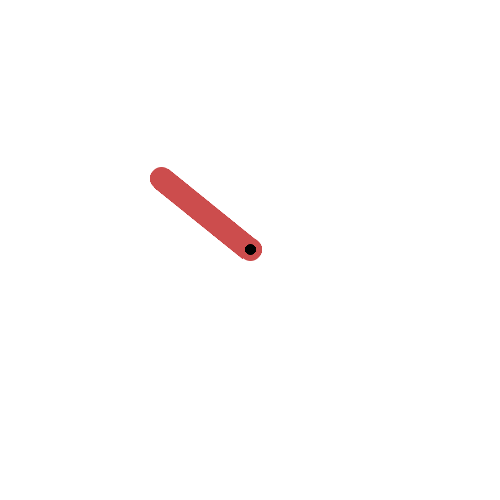

In [11]:
test_policy_func = PolicyNetFunc.from_file(MODEL_PATH)
_render_env = Env(gym.make(GYM_ENV_NAME, render_mode='rgb_array_list'))
policy_func_tester = PolicyNetTester(
    policy_fun=test_policy_func.to('cpu'),
    env=_render_env,
    action_converter=Discrete1ContinuousAction(action_space.low, action_space.high, BINS)
)
RESULT_GIF = TEST_OUTPUT_PATH / 'result.gif'
clear_target_path(RESULT_GIF)
policy_func_tester.test(1000)
to_gif(_render_env._gym_env, RESULT_GIF, 1/30)

show_gif_on_jupyternb(RESULT_GIF)